,date_time,geolat,geolong,corrected_ram,corrected_cross_track,geo_east,geo_north,geo_east_cross_track_only,geo_north_cross_track_only
0,2015-03-17 15:01:25,27.7591,351.591,-30.39790,-77.4340,-83.1520,-2.40644,-72.8673,26.1987
1,2015-03-17 15:01:33,28.2260,351.458,-16.56430,-76.0488,-77.0998,10.64930,-71.3933,26.1995
2,2015-03-17 15:01:37,28.4593,351.391,-9.64744,-76.4128,-75.0009,17.51720,-71.6472,26.5629


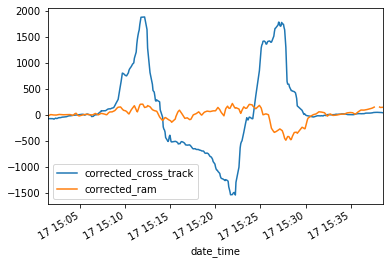

In [40]:
import pandas as pd

cols = ['date','time','geolat','geolong',
        'corrected_ram','corrected_cross_track',  
        'geo_east','geo_north',
        'geo_east_cross_track_only','geo_north_cross_track_only']

dataframe = pd.read_csv('F15_15_21.txt',delimiter=' ',names=cols,parse_dates=[['date','time']])
dataframe.plot('date_time',['corrected_cross_track','corrected_ram'])
dataframe.head(3)

In [43]:
import numpy as np
from geospacepy.satplottools import sathat
#Calculate the time in seconds since the start of the pass
dataframe['seconds'] = [(pd.to_datetime(dt)-dataframe['date_time'][0]).total_seconds() for dt in dataframe['date_time']]
#Get unit vectors in the along track and cross track directions in geographic east-north-up coordinates
uts = dataframe['seconds'].values
pos = np.column_stack([dataframe['geolat'].values,dataframe['geolong'].values])
ram_geo_enu,cross_geo_enu,up_geo_enu = sathat(uts,pos) 
dataframe['liam_geo_east']=(dataframe['corrected_cross_track']*cross_geo_enu[:,0]+\
                            dataframe['corrected_ram']*ram_geo_enu[:,0])
dataframe['liam_geo_north']=(dataframe['corrected_cross_track']*cross_geo_enu[:,1]+\
                             dataframe['corrected_ram']*ram_geo_enu[:,1])
dataframe['liam_geo_east_cross_track_only']=dataframe['corrected_cross_track']*cross_geo_enu[:,0]
dataframe['liam_geo_north_cross_track_only']=dataframe['corrected_cross_track']*cross_geo_enu[:,1]


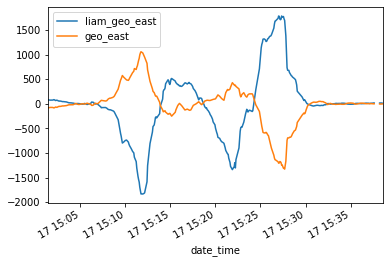

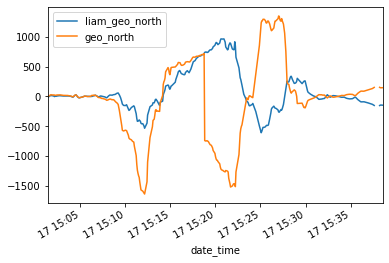

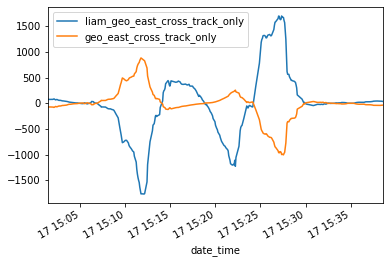

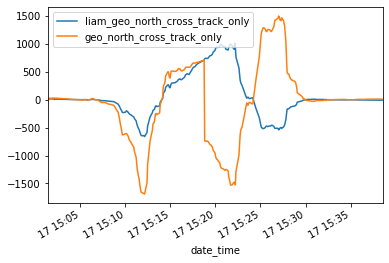

In [45]:
dataframe.plot('date_time',['liam_geo_east','geo_east'])
dataframe.plot('date_time',['liam_geo_north','geo_north'])
dataframe.plot('date_time',['liam_geo_east_cross_track_only','geo_east_cross_track_only'])
dataframe.plot('date_time',['liam_geo_north_cross_track_only','geo_north_cross_track_only'])


In [54]:
newcols = cols.copy()
newcols.extend('liam_'+col for col in cols if 'geo_' in col)
dataframe.to_csv('F15_15_21_liam.txt',
                 sep=' ',
                 date_format='%m/%d/%Y %H:%M:%S',
                 columns=newcols,
                 index=False,
                 float_format='%.4f')